# Using a Priority Queue for Dijkstra's Algorithm

A priority queue can be implemented using a heap. This can then be used to control the search for the shortest route through a weighted directed graph.
Networkx and matplotlib are needed only for making the diagram of the graph. The % line is the 'magic' for including matplotlib figures.

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

Here is the heap for priority queue.

In [2]:
from heapq import heapify, heappop, heappush

class priority_queue():
    def __init__(heap):
        heap.queue = list()
        heapify(heap.queue)
        heap.index = dict()
    def push(heap, priority, label):
        if label in heap.index:
            heap.queue = [(a,b) 
                          for a,b in heap.queue if b!=label]
            heapify(heap.queue)
        heappush(heap.queue, (priority, label))
        heap.index[label] = priority 
    def pop(heap):
        if heap.queue:
            return heappop(heap.queue)
    def __contains__(heap, label):
        return label in heap.index
    def __len__(heap):
        return len(heap.queue)

Here is a graph for testing the algorithm expressed as as dictionary entries.

In [44]:
graph = {'i': {'j':5, 'k':6},
         'j': {'k':5, 'l':5},
         'k': {'l':6, 'm':5},
         'l': {'n':6},
         'm': {'l':4,'n':4},
         'n': {}}

For matplotlib, here is a copy of the graph made in Networkx. As there are directions to the edges a DiGraph is used. The weights are also added as the edges are created from the graph dictionary.

In [27]:
D = nx.DiGraph()
for node in graph:
    D.add_nodes_from(node)
    for edge, weight in graph[node].items():
        D.add_edge(node,edge, weight=weight)

In [33]:
print(D.nodes)

['i', 'j', 'k', 'l', 'm', 'n']


In [28]:
print(D.edges)

[('i', 'j'), ('i', 'k'), ('j', 'k'), ('j', 'l'), ('k', 'l'), ('k', 'm'), ('l', 'n'), ('m', 'l'), ('m', 'n')]


Here is the Networkx diagram of the graph. Although it is not topologically sorted. 

Other layouts are available instead of circular including 'random' and 'spring' (which lets the vertices cluster as if the edgea were under tension like small springs).

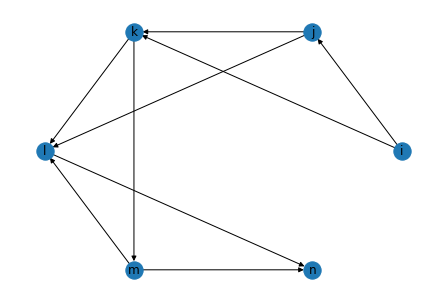

In [39]:
nx.draw(D, pos=nx.circular_layout(D), with_labels=True)
plt.show()

The priority queue can be used to control a search of a graph using Dijkstra's algorithm.

In [46]:
def dijkstra(graph, source, finish):
    inf = float('inf')
    known = set()
    priority = priority_queue()
    path = {source: source}

    for vertex in graph:
        if vertex == source:
            priority.push(0, vertex)
        else:
            priority.push(inf, vertex)

    last = source    
    while last != finish:
        (weight, current_node) = priority.pop()
        if current_node not in known:
            for next_node in graph[current_node]:
                upto_current = priority.index[current_node]
                upto_next = priority.index[next_node]
                to_next = upto_current + \
                graph[current_node][next_node]
                if to_next < upto_next:
                    priority.push(to_next, next_node)
                    print("updating shortest from %s to %s" 
                          % (current_node, next_node))
                    print ("total distance: %i" 
                           % to_next)
                    path[next_node] = current_node
                    
            last = current_node
            known.add(current_node)
    
    return priority.index, path

Here is the dijkstra search applied to the graph defined earlier. 

The source is *i* and the finish is *n* - as can be seen in the Networkx copy based on the out-degree and in-degree values for these vertices. 

When a new 'shortcut' is discovered in the run then the shortest path is updated. 

In [47]:
dist, path = dijkstra(graph, 'i', 'n')

updating shortest from i to j
total distance: 5
updating shortest from i to k
total distance: 6
updating shortest from j to l
total distance: 10
updating shortest from k to m
total distance: 11
updating shortest from l to n
total distance: 16
updating shortest from m to n
total distance: 15
